# 7.12.2023

Compositional analysis of the COPD-IAV scRNA dataset using scCoda (pertpy):

6 Patients with and 6 without chronic obstructive pulmonary disease (COPD).
Epithelial cells extracted with a lung wash and exposed to IAV (Control and IAV n=3 for both COPD and healthy patients)
--> scRNA-seq and cell types annotated

Created mamba environment in /Users/egerc/miniforge3/envs/pertpy-env
$ mamba create -n pertpy-env python=3.10
$ mamba activate pertpy-env

In [2]:
import warnings

import pandas as pd

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

import scanpy as sc
import numpy as np
#import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import altair as alt
import pertpy as pt

Manual git installation of pertpy necessary due to Apple silicon
$ git clone https://github.com/theislab/pertpy.git
$ cd pertpy
$ pip install .

In [3]:
adata = sc.read_h5ad("Marburg_cell_states_locked_scANVI_ctl230901.raw.h5ad")
print(adata)
#adata object created from the annotated h5ad file.

AnnData object with n_obs × n_vars = 97573 × 27208
    obs: 'sex', 'age', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'condition', 'sample_group', 'IAV_score', 'group', 'Viral_score', 'cell_type', 'cell_states', 'leiden', 'cell_compartment', 'seed_labels', '_scvi_batch', '_scvi_labels', 'C_scANVI'
    var: 'mt', 'ribo'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'


In [4]:
adata.obs

,sex,age,ethnicity,PaCO2,donor,infection,disease,SMK,illumina_stimunr,bd_rhapsody,...,group,Viral_score,cell_type,cell_states,leiden,cell_compartment,seed_labels,_scvi_batch,_scvi_labels,C_scANVI
493638-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,healthy_ctrl,-0.993291,ciliated,OMG+Ciliated,MultiC_0,Ciliated,Ciliated,0,1,Ciliated
816750-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,healthy_ctrl,-1.685051,ciliated,APOD+Ciliated,MultiC_1,Ciliated,Ciliated,0,1,Ciliated
678000-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,healthy_ctrl,-0.506433,ciliated,TCN1+Club,MultiC_3,Club,Club,0,2,Ciliated
247802-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,healthy_ctrl,-1.299193,ciliated,TCN1+Club,MultiC_3,Club,Club,0,2,Club
177433-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,healthy_ctrl,-1.502644,ciliated,TCN1+Club,MultiC_3,Club,Club,0,2,Club
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097861-CSE03_IAV-V6,male,66,caucasian,76.8,CSE-03,IAV,COPD,8,21_0507,6,...,copd_iav,-2.114714,mixed,IGFBP6+Basal,Mixed_7,Basal,Basal,0,0,Basal
7239232-CSE03_IAV-V6,male,66,caucasian,76.8,CSE-03,IAV,COPD,8,21_0507,6,...,copd_iav,-3.002878,mixed,KRT16+SupraB,Mixed_9,SupraB,SupraB,0,8,SupraB
5330709-CSE03_IAV-V6,male,66,caucasian,76.8,CSE-03,IAV,COPD,8,21_0507,6,...,copd_iav,-2.085706,mixed,KRT16+SupraB,Mixed_9,SupraB,SupraB,0,8,SupraB
1638545-CSE03_IAV-V6,male,66,caucasian,76.8,CSE-03,IAV,COPD,8,21_0507,6,...,copd_iav,-1.008348,mixed,SERPINE1+Basal,Mixed_3,Basal,Basal,0,0,Basal


In [5]:
adata.obs["infection&disease"] = adata.obs["infection"].str.cat(adata.obs["disease"], sep = "&")
adata.obs
#creating a new obs based on adding obs infection and obs disease --> CTRL&COPD, IAV&COPD, CTRL&healthy, IAV&healthy

,sex,age,ethnicity,PaCO2,donor,infection,disease,SMK,illumina_stimunr,bd_rhapsody,...,Viral_score,cell_type,cell_states,leiden,cell_compartment,seed_labels,_scvi_batch,_scvi_labels,C_scANVI,infection&disease
493638-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,-0.993291,ciliated,OMG+Ciliated,MultiC_0,Ciliated,Ciliated,0,1,Ciliated,CTRL&healthy
816750-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,-1.685051,ciliated,APOD+Ciliated,MultiC_1,Ciliated,Ciliated,0,1,Ciliated,CTRL&healthy
678000-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,-0.506433,ciliated,TCN1+Club,MultiC_3,Club,Club,0,2,Ciliated,CTRL&healthy
247802-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,-1.299193,ciliated,TCN1+Club,MultiC_3,Club,Club,0,2,Club,CTRL&healthy
177433-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,-1.502644,ciliated,TCN1+Club,MultiC_3,Club,Club,0,2,Club,CTRL&healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097861-CSE03_IAV-V6,male,66,caucasian,76.8,CSE-03,IAV,COPD,8,21_0507,6,...,-2.114714,mixed,IGFBP6+Basal,Mixed_7,Basal,Basal,0,0,Basal,IAV&COPD
7239232-CSE03_IAV-V6,male,66,caucasian,76.8,CSE-03,IAV,COPD,8,21_0507,6,...,-3.002878,mixed,KRT16+SupraB,Mixed_9,SupraB,SupraB,0,8,SupraB,IAV&COPD
5330709-CSE03_IAV-V6,male,66,caucasian,76.8,CSE-03,IAV,COPD,8,21_0507,6,...,-2.085706,mixed,KRT16+SupraB,Mixed_9,SupraB,SupraB,0,8,SupraB,IAV&COPD
1638545-CSE03_IAV-V6,male,66,caucasian,76.8,CSE-03,IAV,COPD,8,21_0507,6,...,-1.008348,mixed,SERPINE1+Basal,Mixed_3,Basal,Basal,0,0,Basal,IAV&COPD


In [6]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    adata,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="cell_type",
    sample_identifier="batch",
    covariate_obs=["infection", "disease", "infection&disease"],
)
sccoda_data

MuData object with n_obs × n_vars = 97597 × 27213
  2 modalities
    rna:	97573 x 27208
      obs:	'sex', 'age', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'condition', 'sample_group', 'IAV_score', 'group', 'Viral_score', 'cell_type', 'cell_states', 'leiden', 'cell_compartment', 'seed_labels', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'infection&disease', 'scCODA_sample_id'
      var:	'mt', 'ribo'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
    coda:	24 x 5
      obs:	'infection', 'disease', 'infection&disease', 'batch'
      var:	'n_cells'

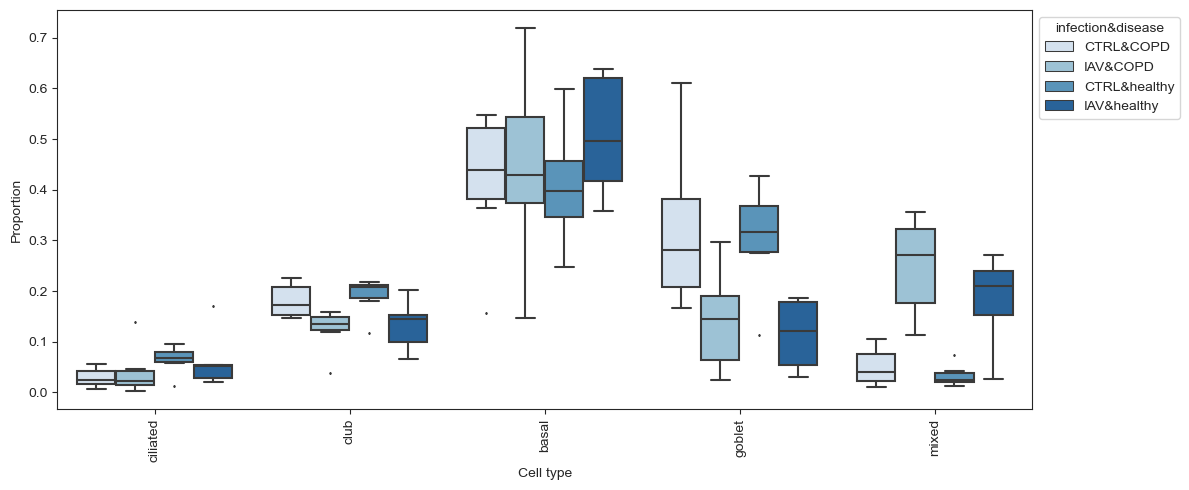

In [7]:
pt.pl.coda.boxplots(
    sccoda_data,
    modality_key="coda",
    feature_name="infection&disease",
    figsize=(12, 5),
    add_dots=False,
    args_swarmplot={"palette": ["red"]},
)
plt.show()

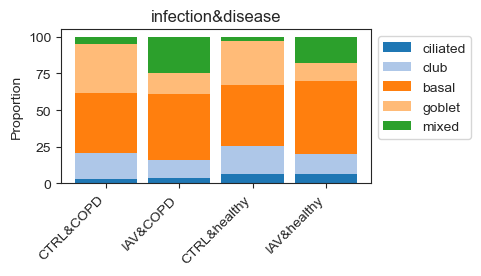

In [8]:
pt.pl.coda.stacked_barplot(
    sccoda_data, modality_key="coda", feature_name="infection&disease", figsize=(4, 2)
)
plt.show()

Function sccoda.run_nuts() broken at the moment
https://github.com/theislab/pertpy/issues/454
Downgrading Jax didn't solve the issue for me.

In [9]:
sccoda_data = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda",
    formula="infection",
    reference_cell_type="automatic",
)
sccoda_model.run_nuts(sccoda_data, modality_key="coda", rng_key=1234)

Automatic reference selection! Reference cell type set to club

  0%|          | 0/11000 [00:00<?, ?it/s]


TracerBoolConversionError: Attempted boolean conversion of traced array with shape bool[]..
The error occurred while tracing the function _body_fn at /Users/egerc/miniforge3/envs/pertpy-env/lib/python3.10/site-packages/numpyro/infer/hmc_util.py:1001 for while_loop. This value became a tracer due to JAX operations on these lines:

  operation a[35m:i64[][39m = convert_element_type[new_dtype=int64 weak_type=False] b
    from line /var/folders/qm/v_v5_1r52bx792m7x2mh177c0000gn/T/ipykernel_23192/3621082981.py:7 (<module>)

  operation a[35m:bool[][39m = ge b c
    from line /var/folders/qm/v_v5_1r52bx792m7x2mh177c0000gn/T/ipykernel_23192/3621082981.py:7 (<module>)
See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.TracerBoolConversionError